# Data-X Spring 2019: Homework 9

## Student name: Daniel Chung






## Student id: 3034347346

**Q1.** You have now seen how Neural networks work. You have also seen how to create and visualize neural networks using Tensorflow and Tensorboard. In this Question, you will be working on Neural networks. You will be using MNIST data (labelled images of digits) that we discussed in the class to create vanilla dense Neural network model using **tensorflow** (You can use 1.x and 2.x as well, **You can use Tensorflow with Keras**) with the following characteristics:
- Input layer size of 784 (Since each image is 28 * 28)
- Three hidden layers of 300, 200 , 100
- Output layer of 10 (Since 0 - 9 digits)
- Use stochastic gradient descent
- Any other requirements can be your choice


Note that you have to define own functions for calculating loss function, optimizer to feed into the neural network. 




**Plot your neural network graph (using tensorboard) and the plot of performance results (Training and Validation accuracies and loss) for every epoch**

Note: You can access MNIST data from **keras.datasets** [Link](https://keras.io/datasets/#mnist-database-of-handwritten-digits) or any standard available MNIST datasource (http://yann.lecun.com/exdb/mnist/) 

In [9]:
tf.__version__

'2.0.0-alpha0'

In [14]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

# Input information
print('Train input shape:', x_train.shape)
print('Test input shape:', x_test.shape)
print('Input data type:', x_train.dtype)

# Output information:
print('Train output shape:', y_train.shape)
print('Test output shape:', y_test.shape)
print('Data type:', y_train.dtype)

print('Unique labels:', np.unique(y_train))
print('First 10 outputs:')
print(y_train[:10])

# Normalize the data, flatten inputs, and convert datatype
x_train_flat = x_train.reshape(60000, 784).astype('float32') / 255
x_test_flat = x_test.reshape(10000, 784).astype('float32') / 255

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8
Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8
Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


In [15]:
# Load libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Setup tensorboard
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

# Make directory if it doesn't exist
from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep, home, logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

# Create a tensorboard callback instance
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, 
                                                      histogram_freq=1)
logdir

'/tmp/tf_logs/r20190424210914/'

In [10]:
# Initialize model constructor
model = Sequential()

# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, input_shape=(784,))) # hidden layer 1
model.add(Dense(200, activation=tf.nn.relu)) # hidden layer 2
model.add(Dense(100, activation=tf.nn.relu)) # hidden layer 3
model.add(Dense(10, activation='softmax')) # output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [11]:
# Train the model
NO_EPOCHS = 10

history = model.fit(x_train_flat, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

# Test the model
test_scores = model.evaluate(x_test_flat, y_test, verbose=0)
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.9493 - accuracy: 0.7507 - val_loss: 0.3900 - val_accuracy: 0.8939
Epoch 2/10
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3556 - accuracy: 0.9003 - val_loss: 0.3009 - val_accuracy: 0.9162
Epoch 3/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.2881 - accuracy: 0.9180 - val_loss: 0.2537 - val_accuracy: 0.9290
Epoch 4/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.2508 - accuracy: 0.9277 - val_loss: 0.2227 - val_accuracy: 0.9383
Epoch 5/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.2228 - accuracy: 0.9365 - val_loss: 0.2057 - val_accuracy: 0.9419
Epoch 6/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.2011 - accuracy: 0.9421 - val_loss: 0.1883 - val_accuracy: 0.9478
Epoch 7/10
48000/48000 [==============================] 

In [5]:
# Plot the neural network graph (using tensorboard)
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190423200429/
TensorBoard 1.14.0a20190301 at http://localhost:6006 (Press CTRL+C to quit)
^C


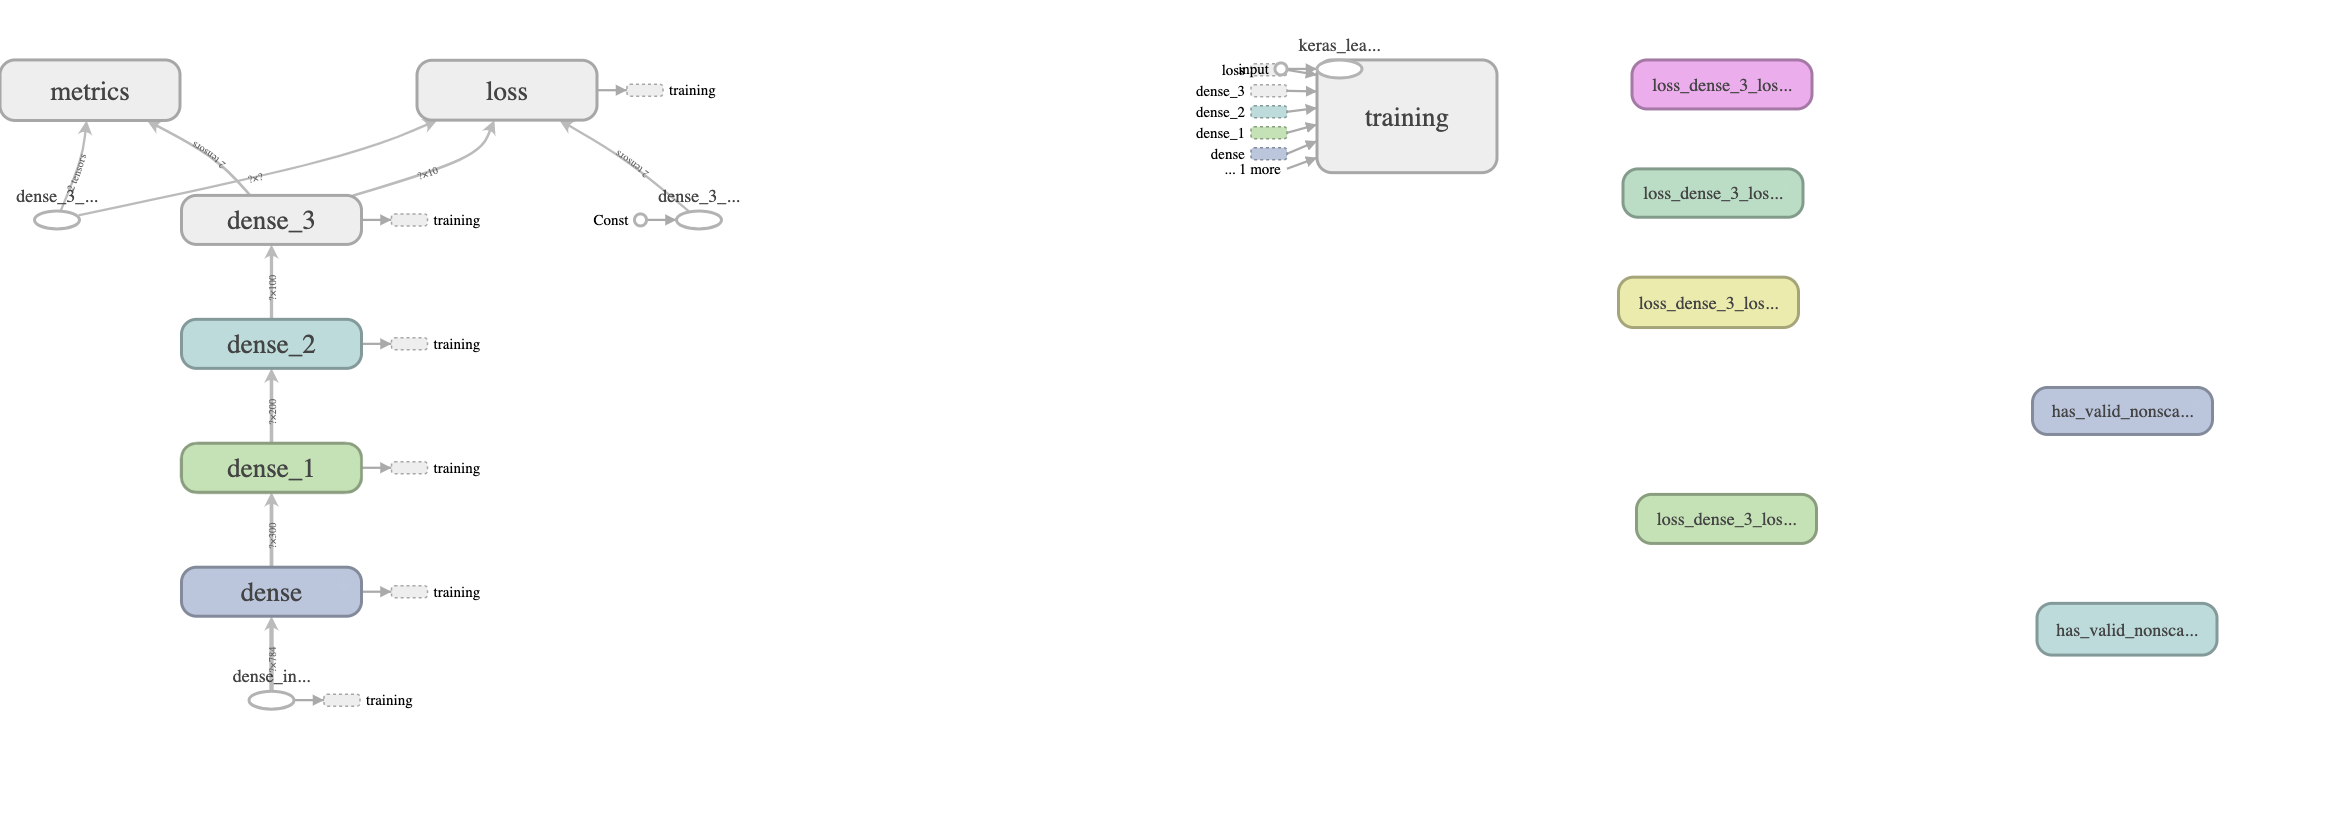

In [10]:
from IPython.display import Image
Image(filename="q1_network_graph.png")

In [3]:
# Plot of performance results (training and validation accuracies and loss) for every epoch
def plot_loss_acc(hist):
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['accuracy'], 'o-')
    ax.plot([None] + hist.history['val_accuracy'], 'x-')
    
    ax.legend(['Train acc', 'Validation acc'], loc=0) # use best loc automatically
    ax.set_title('Training/Validation acc per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
    
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['loss'], 'o-',c='r')
    ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
    
    ax.legend(['Train loss', 'Validation loss'], loc=0) # use best loc automatically
    ax.set_title('Training/Validation loss per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss') 
    plt.plot()


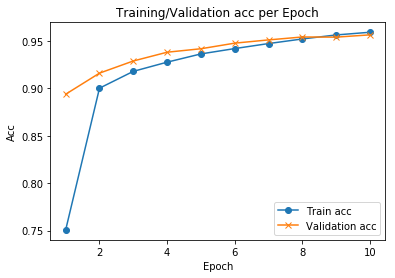

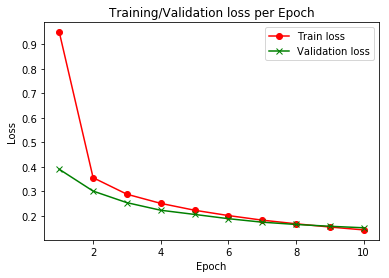

In [12]:
# Plot of performance results (training and validation accuracies and loss) for every epoch
plot_loss_acc(history)

**Q2.** Use transfer learning and use the Imagenet VGG16 model to train on MNIST data. You can use **Keras** for solving this question. You can choose any requirements on loss function, optimizer etc. **Plot the performance results (Training and Validation accuracies & loss) for every epoch**

In [4]:
# Load libraries
import cv2
from tensorflow.keras import applications # load the VGG16 model in Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define variables
TRAIN_DIR = './mnist_png/training/'
TEST_DIR = './mnist_png/testing/'

img_width, img_height = 150, 150

n_train_samples = 60000
n_test_samples = 10000
n_epoch = 20

In [110]:
# Function for saving bottleneck features

#  Run model once to record the bottleneck features using image data generators:
def save_bottleneck_features():
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet', \
                                     input_tensor=None, input_shape=(img_width, img_height, 3))
    
    print('TensorFlow VGG16 model architecture loaded')
    
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR, n_samples, name_str):
        print('Generate ' + name_str + ' image features')
    
        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=1,
            color_mode='rgb',
            class_mode=None,
            shuffle=False) # our data will be in order
        
        features = model.predict_generator(generator, n_samples, verbose=True)
        # the predict_generator method returns the output of a model, given
        # a generator that yields batches of numpy data
        
        np.save('features_' + name_str + '.npy', features) # save bottleneck features to file
    
    generate_features(TEST_DIR, n_test_samples, 'test')
    generate_features(TRAIN_DIR, n_train_samples, 'train')
    #generate_features(VAL_DIR, n_validation_samples, 'validation')
    
    print('\nDone! Bottleneck features have been saved')

save_bottleneck_features()

TensorFlow VGG16 model architecture loaded
Generate test image features
Found 10000 images belonging to 10 classes.
10000/10000 [==============================] - 1037s 104ms/step
Generate train image features
Found 60000 images belonging to 10 classes.
60000/60000 [==============================] - 7418s 124ms/step

Done! Bottleneck features have been saved


In [17]:
# Load in bottleneck features
train_data = np.load('features_train.npy')
test_data = np.load('features_test.npy')

# Generate labels for train and test data
datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_directory(TRAIN_DIR, target_size=(img_width, img_height),
                                        batch_size=32, class_mode=None, shuffle=False)
test_gen = datagen.flow_from_directory(TEST_DIR, target_size=(img_width, img_height),
                                        batch_size=32, class_mode=None, shuffle=False)

train_labels = train_gen.classes
test_labels = test_gen.classes

print('\nTrain Classifications:\n', train_gen.class_indices)
print('\nTrain Class labels:\n', train_labels)
print('\nTest Classifications:\n', train_gen.class_indices)
print('\nTest Class labels:\n', train_labels)


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.

Train Classifications:
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Train Class labels:
 [0 0 0 ... 9 9 9]

Test Classifications:
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Test Class labels:
 [0 0 0 ... 9 9 9]


In [18]:
# Add top layers trained ontop of extracted VGG features
# Small fully connected model trained on top of the stored features
model_vgg = Sequential()
model_vgg.add(Flatten(input_shape=train_data.shape[1:]))
model_vgg.add(Dense(256, activation=tf.nn.relu))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(64, activation=tf.nn.relu))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(10, activation='softmax'))

# Compile the model
model_vgg.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                                              epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [20]:
# Train the model
NO_EPOCHS = 10
history_vgg = model_vgg.fit(train_data, train_labels, verbose=1, \
                    nb_epoch=NO_EPOCHS, batch_size=32, \
                    validation_data=(test_data, test_labels),
                    callbacks=[tensorboard_callback])

# Test the model
test_scores = model_vgg.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', test_scores[1])

W0424 14:13:30.882115 4518278592 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 311us/sample - loss: 0.1182 - accuracy: 0.9665 - val_loss: 0.0474 - val_accuracy: 0.9873
Epoch 2/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1114 - accuracy: 0.9669 - val_loss: 0.0481 - val_accuracy: 0.9864
Epoch 3/10
60000/60000 [==============================] - 18s 308us/sample - loss: 0.1069 - accuracy: 0.9681 - val_loss: 0.0503 - val_accuracy: 0.9872
Epoch 4/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0991 - accuracy: 0.9708 - val_loss: 0.0459 - val_accuracy: 0.9885
Epoch 5/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0996 - accuracy: 0.9705 - val_loss: 0.0512 - val_accuracy: 0.9866
Epoch 6/10
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 7/10
60000/60000 [====================

In [10]:
# Plot the neural network graph (using tensorboard)
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190424063550/
TensorBoard 1.14.0a20190301 at http://localhost:6006 (Press CTRL+C to quit)
^C


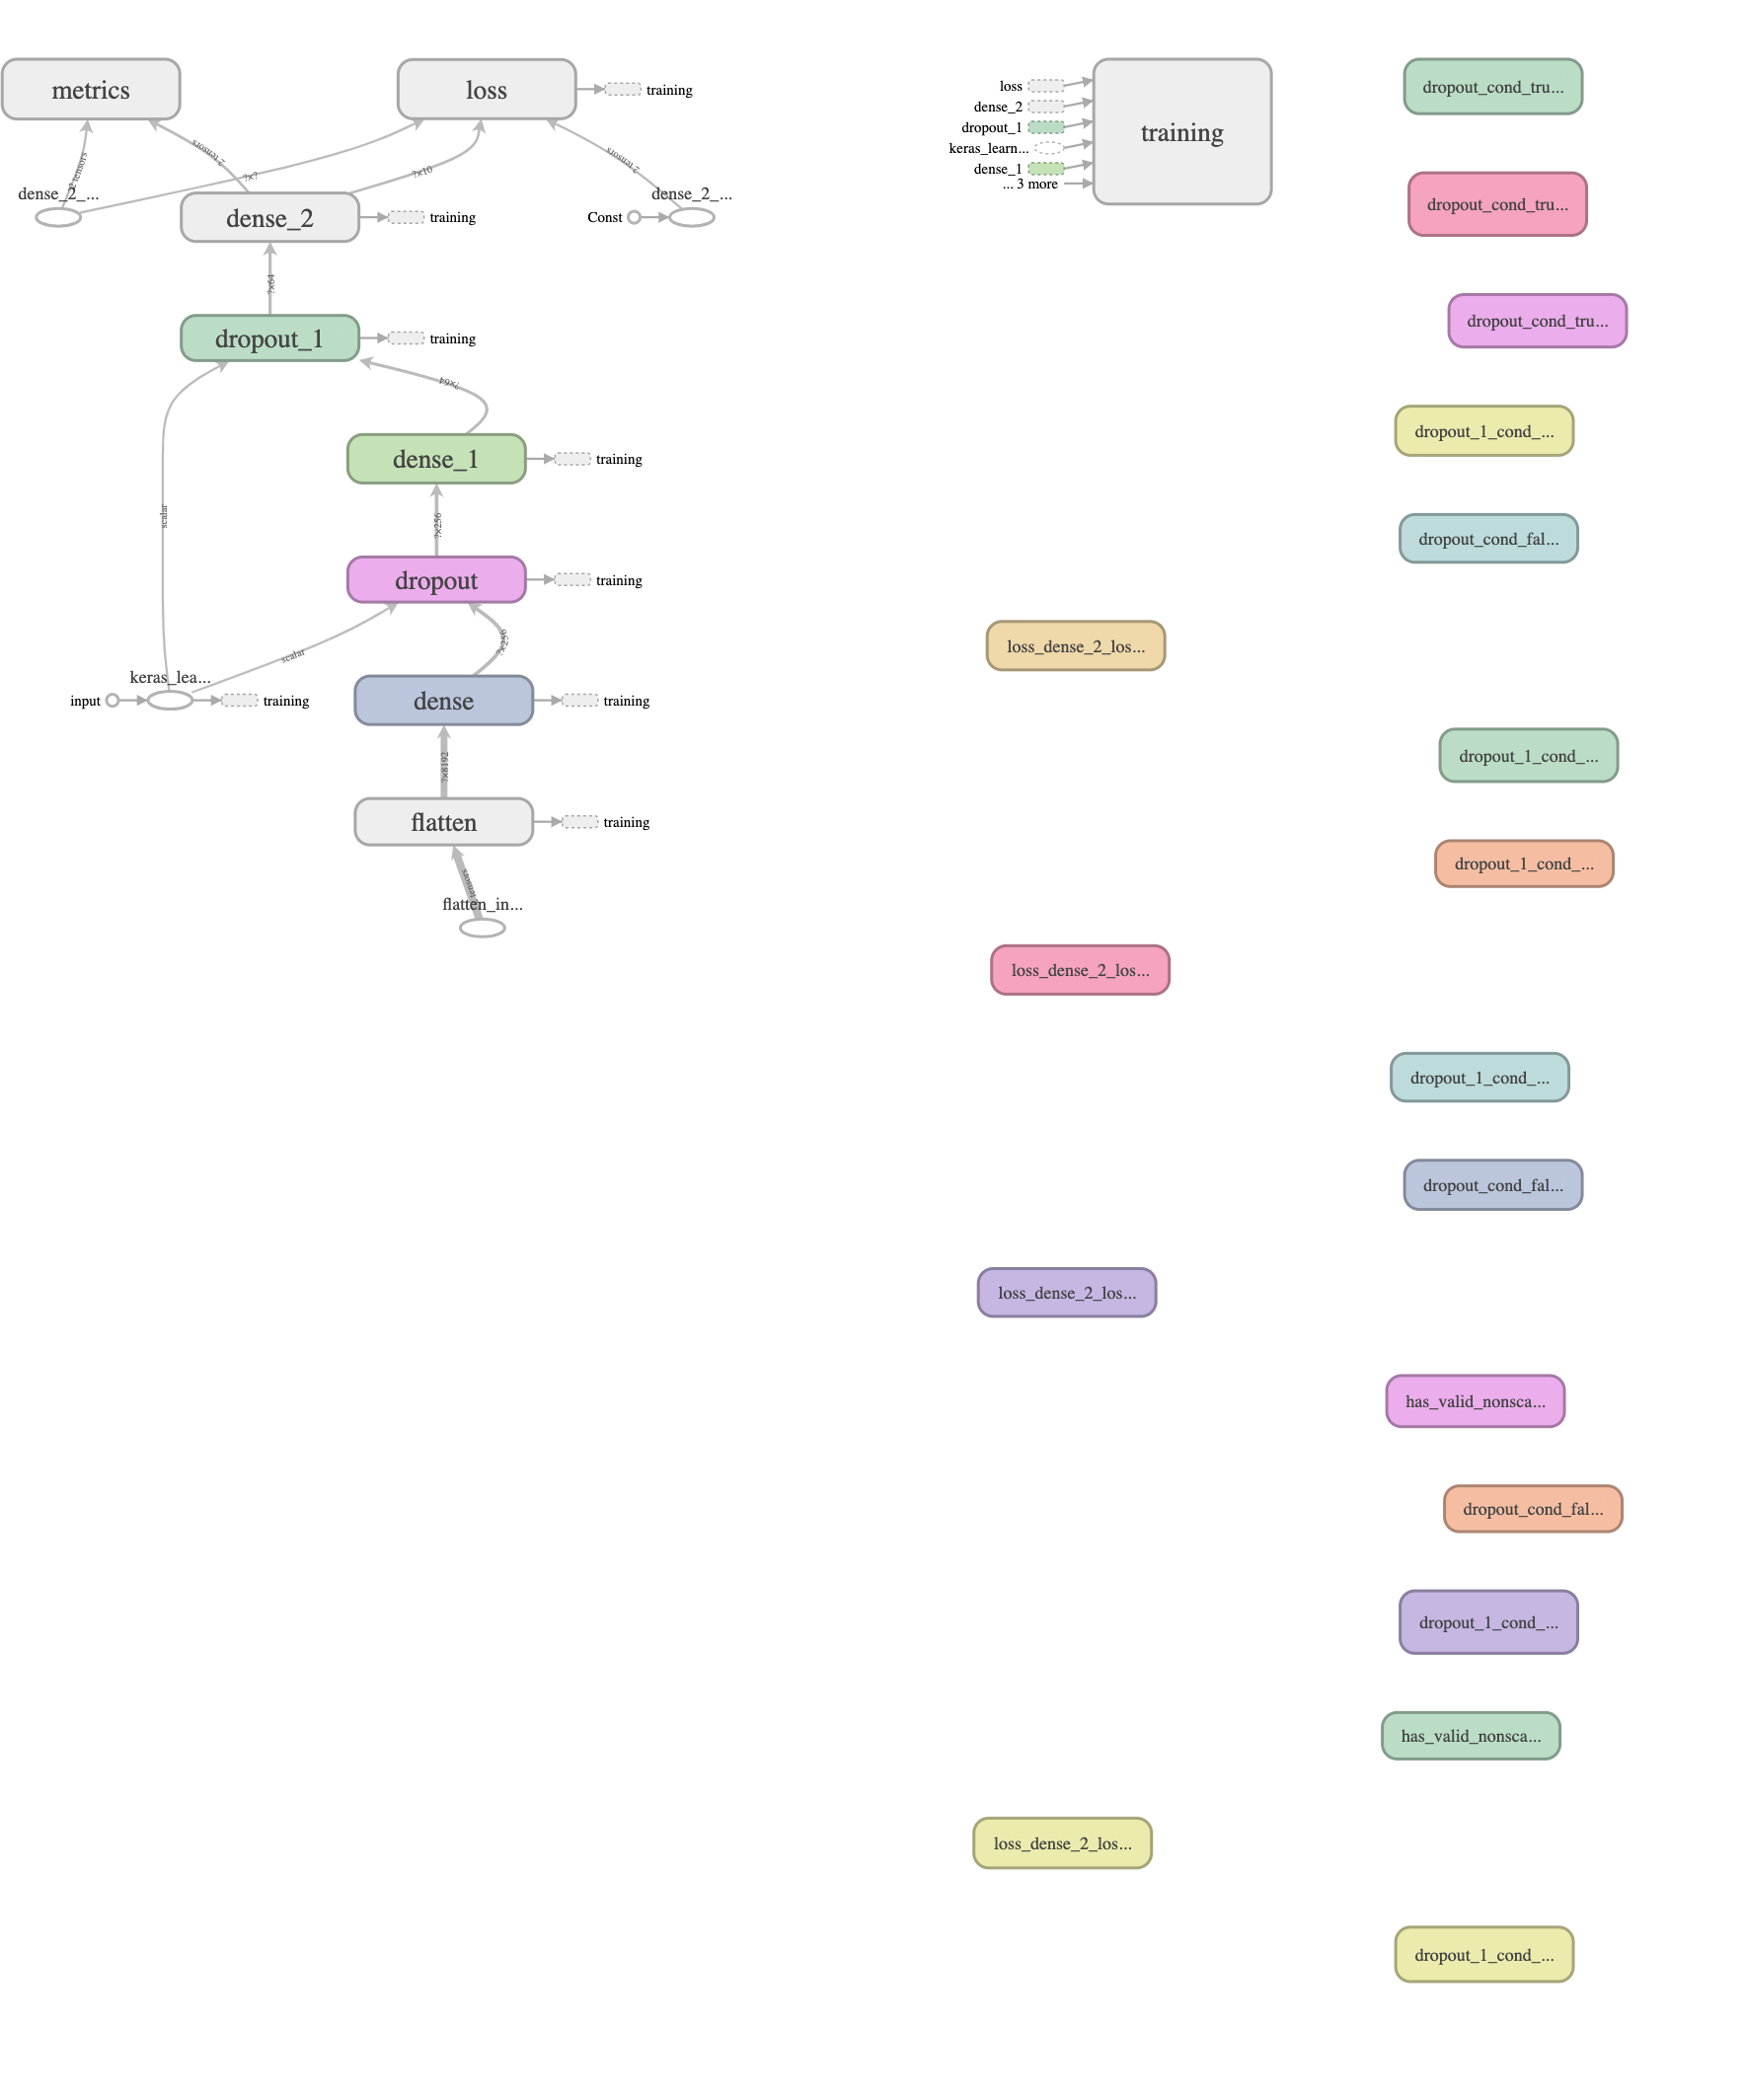

In [11]:
from IPython.display import Image
Image(filename="q2_network_graph.png")

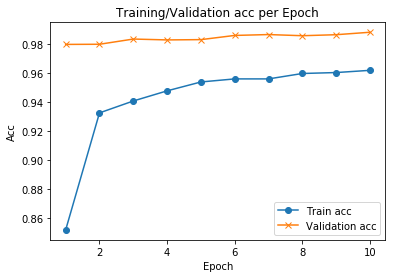

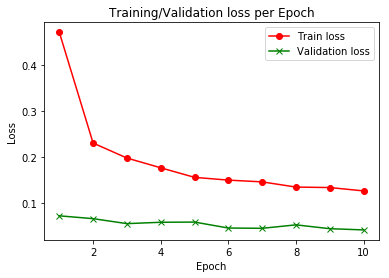

In [8]:
# Plot of performance results (training and validation accuracies and loss) for every epoch
plot_loss_acc(history_vgg)

**EXTRA CREDIT Q.** **(MANDATORY for students taking IND ENG 290)** Customize your neural networks in **Q1** to how many ever layers you want, use [batch normalization](https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization) and [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) and try different regularization techniques to combat overfitting. Also use as many iterations you want and plot every 10th iteration on the tensorboard. We will give extra credit if you achieve more than **98.5%** on the MNIST data. **Plot the neural network graph (using tensorboard) and describe the settings that you used and the performance results. Also plot performance results (Training and Validation accuracies & loss) for every epoch**

Note: You can use Keras if necessary for solving this question

If you cannot run your tensorflow notebooks locally, you can use. 
https://datahub.berkeley.edu/hub/home

In [5]:
# Load libraries
from tensorflow.keras.layers import BatchNormalization

# Initialize model constructor
model_opt = Sequential()

# Add layers sequentially
model_opt.add(Dense(1024, activation=tf.nn.relu, input_shape=(784,))) # hidden layer 1
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(512, activation=tf.nn.relu)) # hidden layer 2
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(256, activation=tf.nn.relu)) # hidden layer 3
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(64, activation=tf.nn.relu)) # hidden layer 4
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.5))
model_opt.add(Dense(10, activation='softmax')) # output layer

# Compile the model
model_opt.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                                              epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [6]:
# Train the model
NO_EPOCHS = 60
history_opt = model_opt.fit(x_train_flat, y_train,
                    batch_size=256,
                    epochs=NO_EPOCHS,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

# Test the model
test_scores = model_opt.evaluate(x_test_flat, y_test, verbose=0)
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 6s 120us/sample - loss: 0.7521 - accuracy: 0.7731 - val_loss: 0.3218 - val_accuracy: 0.9038
Epoch 2/60
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2812 - accuracy: 0.9230 - val_loss: 0.1341 - val_accuracy: 0.9617
Epoch 3/60
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2052 - accuracy: 0.9439 - val_loss: 0.1141 - val_accuracy: 0.9672
Epoch 4/60
48000/48000 [==============================] - 5s 99us/sample - loss: 0.1656 - accuracy: 0.9533 - val_loss: 0.0980 - val_accuracy: 0.9737
Epoch 5/60
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1433 - accuracy: 0.9600 - val_loss: 0.1038 - val_accuracy: 0.9707
Epoch 6/60
48000/48000 [==============================] - 5s 103us/sample - loss: 0.1297 - accuracy: 0.9638 - val_loss: 0.1035 - val_accuracy: 0.9731
Epoch 7/60
48000/48000 [=============================

48000/48000 [==============================] - 5s 98us/sample - loss: 0.0278 - accuracy: 0.9924 - val_loss: 0.0736 - val_accuracy: 0.9842
Epoch 56/60
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0834 - val_accuracy: 0.9833
Epoch 57/60
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0753 - val_accuracy: 0.9844
Epoch 58/60
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0824 - val_accuracy: 0.9827
Epoch 59/60
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0769 - val_accuracy: 0.9843
Epoch 60/60
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.0744 - val_accuracy: 0.9853
Test accuracy: 0.986


### Describe the settings that you used and the performance results.
I trained a dense 4 hidden layer NN with (1024, 512, 256, 64) nodes in each layer respectively. At every hidden layer we perform dropout regularization with a probability of 0.5 and perform batch normalization on the hidden layer activations. We use the Adam optimizer with a learning rate of 0.001, beta_1 value of 0.9, and beta_2 value of 0.999.
<br>

Using the above settings the model is able to reach a test accuracy of 98.6% (> 98.5%) after 60 epochs.

In [8]:
# Plot the neural network graph (using tensorboard)
print(logdir)

# Run tensorboard in the shell
!tensorboard --logdir $logdir --host=localhost

/tmp/tf_logs/r20190424081622/
TensorBoard 1.14.0a20190301 at http://localhost:6006 (Press CTRL+C to quit)
^C


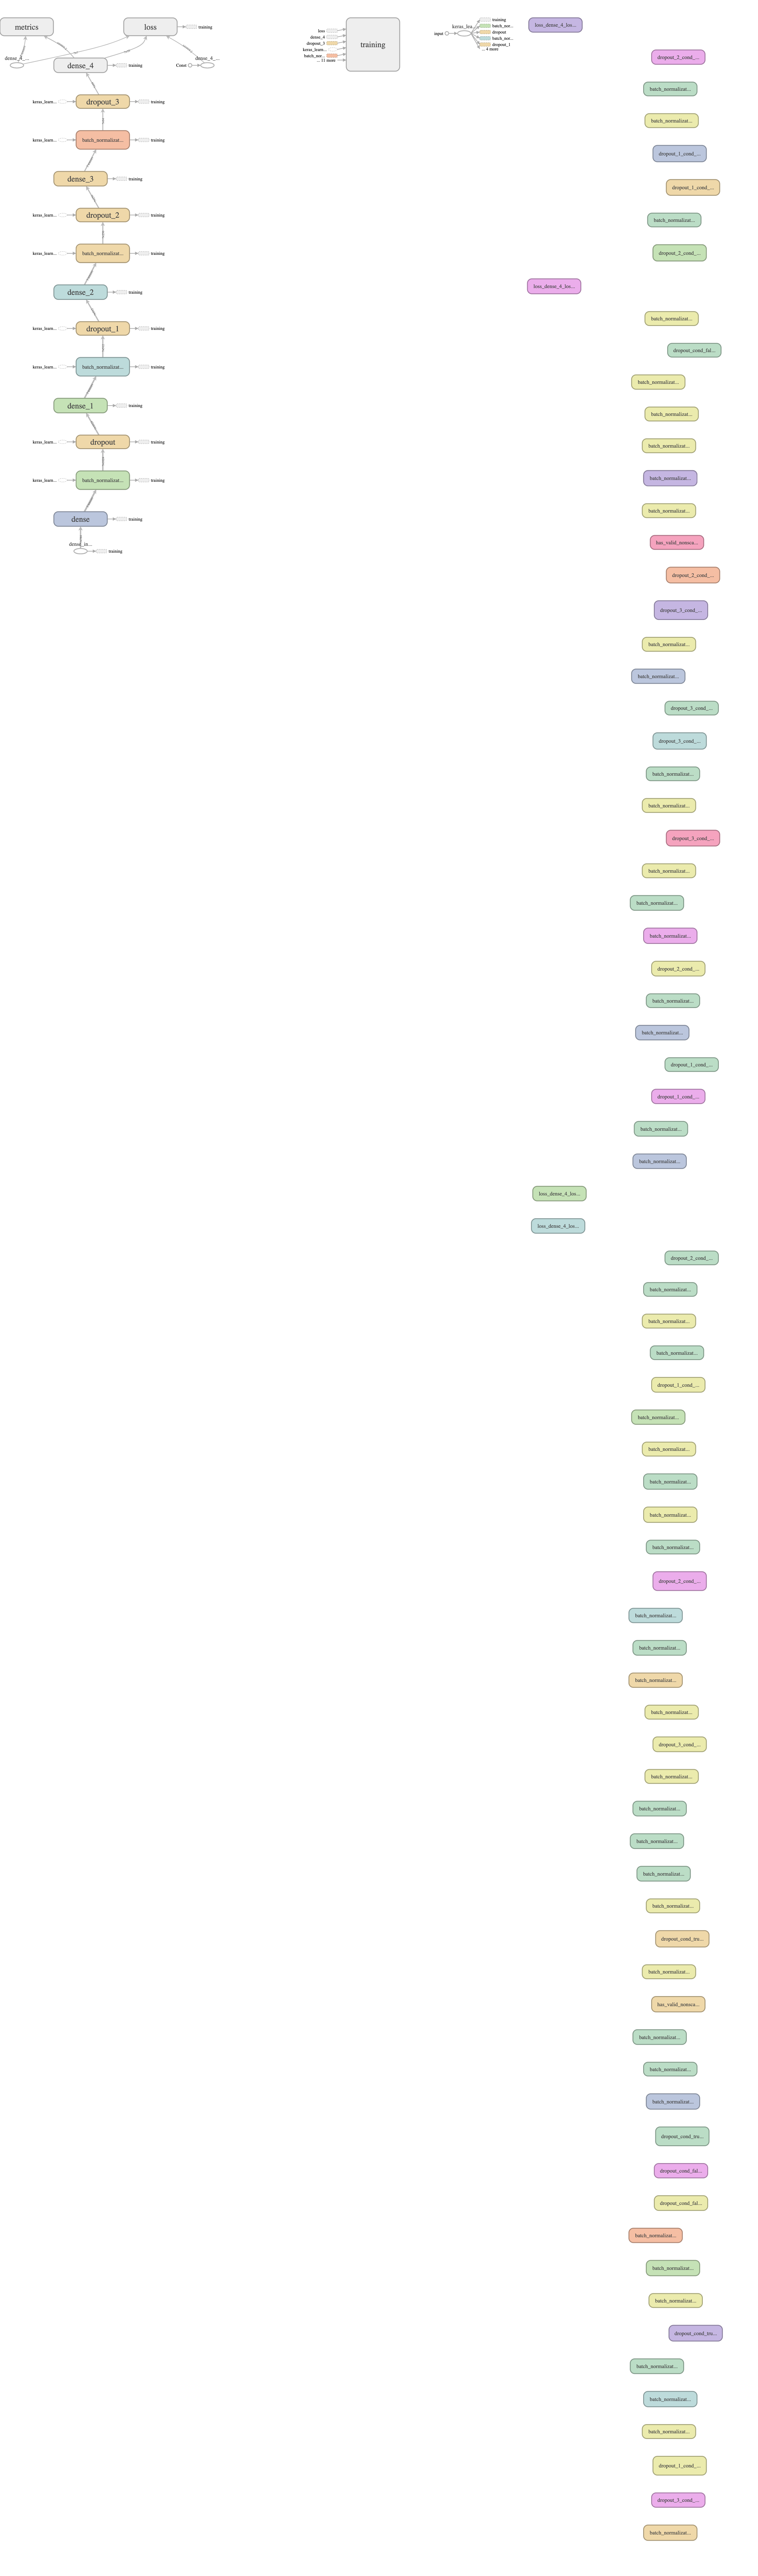

In [12]:
from IPython.display import Image
Image(filename="q3_network_graph.png")

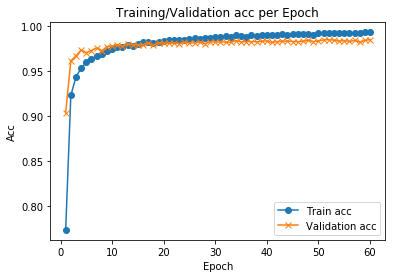

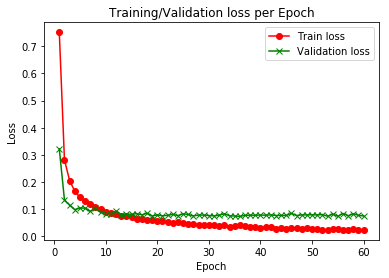

In [7]:
# Plot of performance results (training and validation accuracies and loss) for every epoch
plot_loss_acc(history_opt)